In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


Load the MNIST dataset

In [13]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [6 8 2 2 3 5 7 5 6 9]


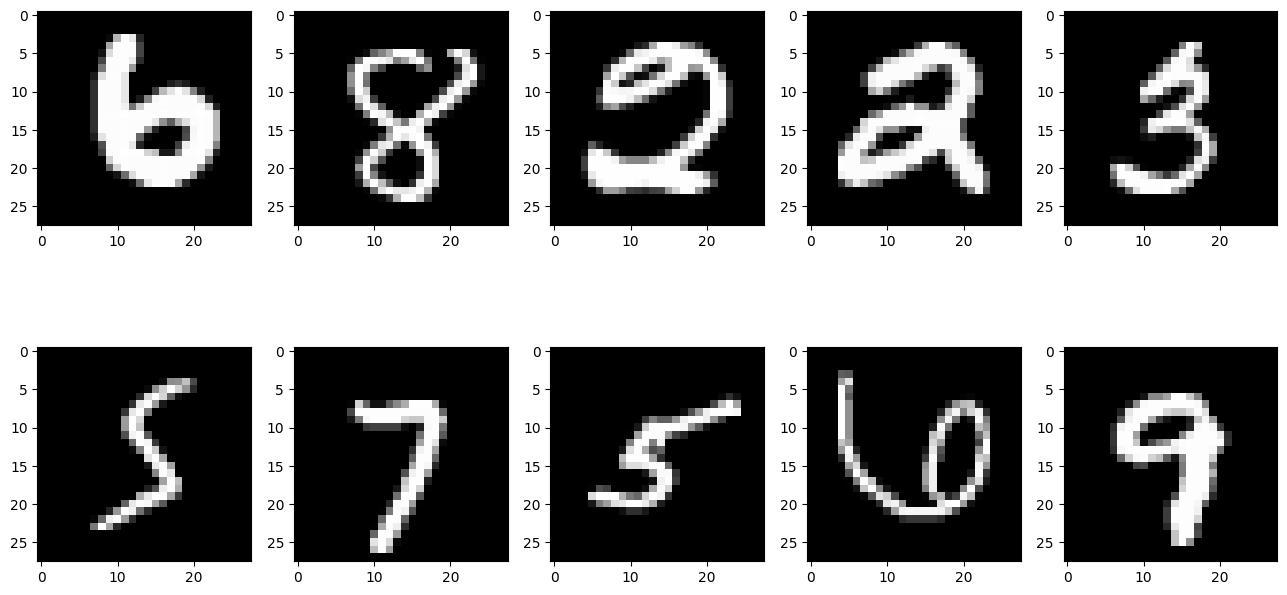

In [14]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [15]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))

# original
# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,input_dim=64,activation='relu'))
# model.add(Dense(32,input_dim=64,activation='relu'))
# model.add(Dense(10,input_dim=32,activation='softmax'))

# more layers
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(10, activation='softmax'))

#  wider layers
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# wider + more layers
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(10, activation='softmax'))

# regularization terms l1 and l2 for original configuration
model.add(
    Dense(
        64, activation="relu", kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
    )
)

model.add(
    Dense(
        64,
        input_dim=64,
        activation="relu",
        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
    )
)

model.add(
    Dense(
        32,
        input_dim=64,
        activation="relu",
        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
    )
)

# 
model.add(
    Dense(10, input_dim=32, activation="softmax")
) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\Raizurai\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Raizurai\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [18]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.8831 - loss: 1.2078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 913us/step - accuracy: 0.9263 - loss: 0.7196
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.9341 - loss: 0.6064
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9370 - loss: 0.5553
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 915us/step - accuracy: 0.9403 - loss: 0.5191
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9418 - loss: 0.4925
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9434 - loss: 0.4721
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 863us/step - accuracy: 0.9453 - loss: 0.4537
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step - accuracy: 0.9459 - loss: 0.4439
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.9471 - loss: 0.4359


Plot the loss and accuracy graphs

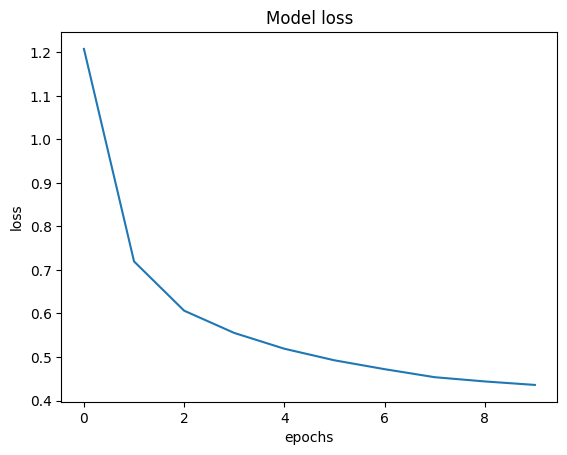

In [19]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

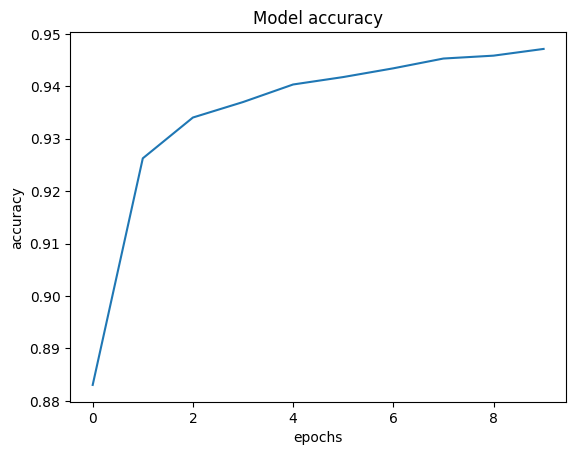

In [20]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [21]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9485 - loss: 0.4170
Loss of the Test dataset is: 0.41695860028266907
Accuracy of the test dataset is: 0.9484999775886536


Save the model weights

In [22]:
model.save_weights('MNIST_WEIGHTS_V10.weights.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step


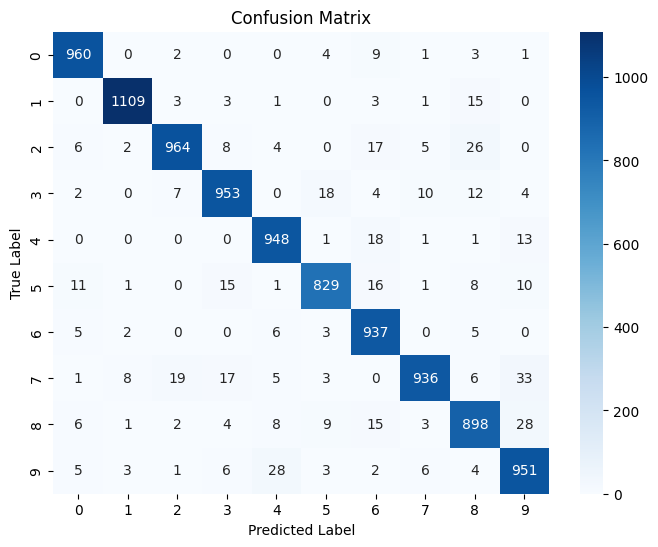

In [23]:
# Simple Confusion Matrix
predictions = model.predict(new_test_data)
predicted_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_target, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()